In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar el dataset de iris
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target



In [2]:
# Mapear los números a los nombres de especies
species_map = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
iris_df['species'] = iris_df['species'].map(species_map)

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
# Calcular los promedios para cada especie
species_means = iris_df.groupby('species').mean()
iris_df



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
species_means

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [5]:
species_means.loc['setosa']- species_means.loc['versicolor']

sepal length (cm)   -0.930
sepal width (cm)     0.658
petal length (cm)   -2.798
petal width (cm)    -1.080
dtype: float64

In [6]:
# Distancias entre los promedios
species_pairs = [('setosa', 'versicolor'), ('setosa', 'virginica'), ('versicolor', 'virginica')]
manhattan_distances = []
euclidean_distances = []

for sp1, sp2 in species_pairs:
    diff = species_means.loc[sp1] - species_means.loc[sp2]
    manhattan_distances.append(np.sum(np.abs(diff)))
    euclidean_distances.append(np.sqrt(np.sum(diff ** 2)))
species_pairs

[('setosa', 'versicolor'),
 ('setosa', 'virginica'),
 ('versicolor', 'virginica')]

In [7]:
manhattan_distances

[5.465999999999999, 7.905999999999999, 2.848]

In [8]:
euclidean_distances

[3.2082811597489393, 4.754507335150509, 1.6204888151419004]

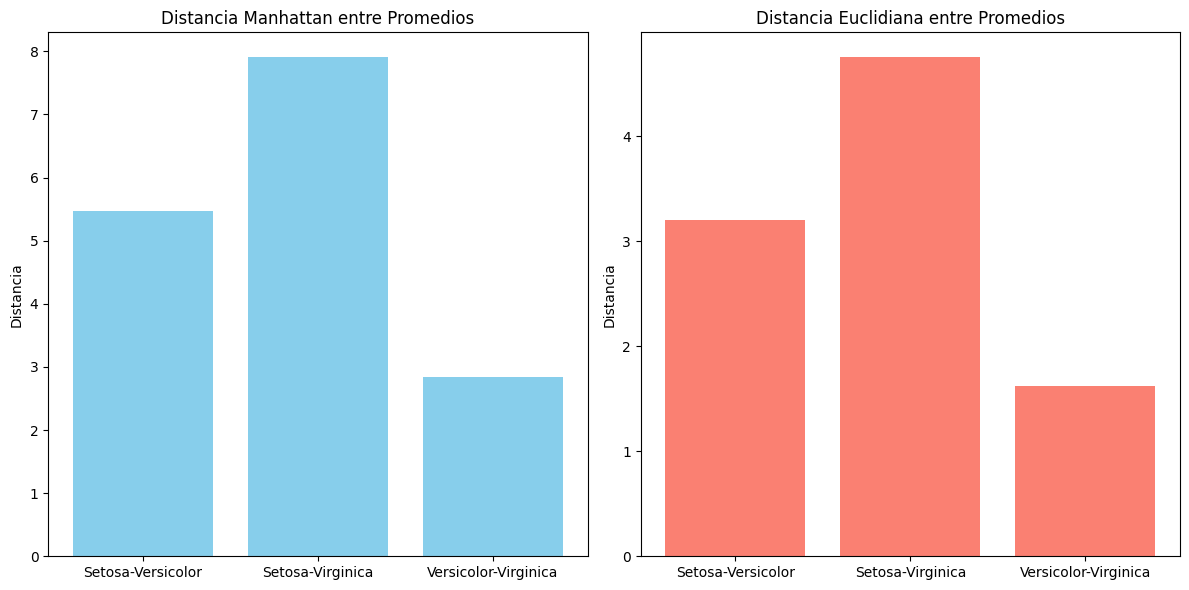

In [9]:
# Graficar las distancias
x_labels = ['Setosa-Versicolor', 'Setosa-Virginica', 'Versicolor-Virginica']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(x_labels, manhattan_distances, color='skyblue')
plt.title('Distancia Manhattan entre Promedios')
plt.ylabel('Distancia')

plt.subplot(1, 2, 2)
plt.bar(x_labels, euclidean_distances, color='salmon')
plt.title('Distancia Euclidiana entre Promedios')
plt.ylabel('Distancia')

plt.tight_layout()
plt.show()


# En conclusión se evidencia que las distancias calculadas permiten segmentar los datos en los diferentes grupos que contenga el dataset, y a su vez permitir hacer clasificación. De hecho es posible usando técnicas de aprendizaje no supervisado como K-means que usa las distancias para hacer clustering de los datos.